In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

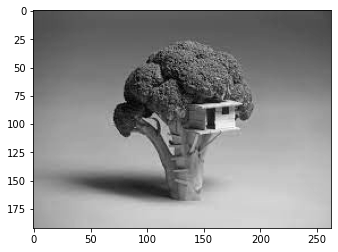

In [4]:
img = plt.imread('download.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap='gray')

In [32]:
def image_plotting(img,ind,title):
    plt.subplot(3,2,ind)
    plt.imshow(img,cmap='gray')
    plt.title(title,fontsize=30)
    
    plt.subplot(3,2,ind+1)
    plt.hist(img.flatten(),255,[0,255],color='b')
    plt.title(title,fontsize=30)
    plt.savefig('assignment_10.jpg')

In [33]:
hist,bins = np.histogram(img,256,[0,256])

m,n = img.shape

cdf = hist.cumsum()
new_img = img.copy()
for i in range(m):
    for j in range(n):
        new_img[i,j] = np.round((cdf[img[i,j]] - cdf.min())/(m*n-cdf.min()) * ((1<<8) -1))

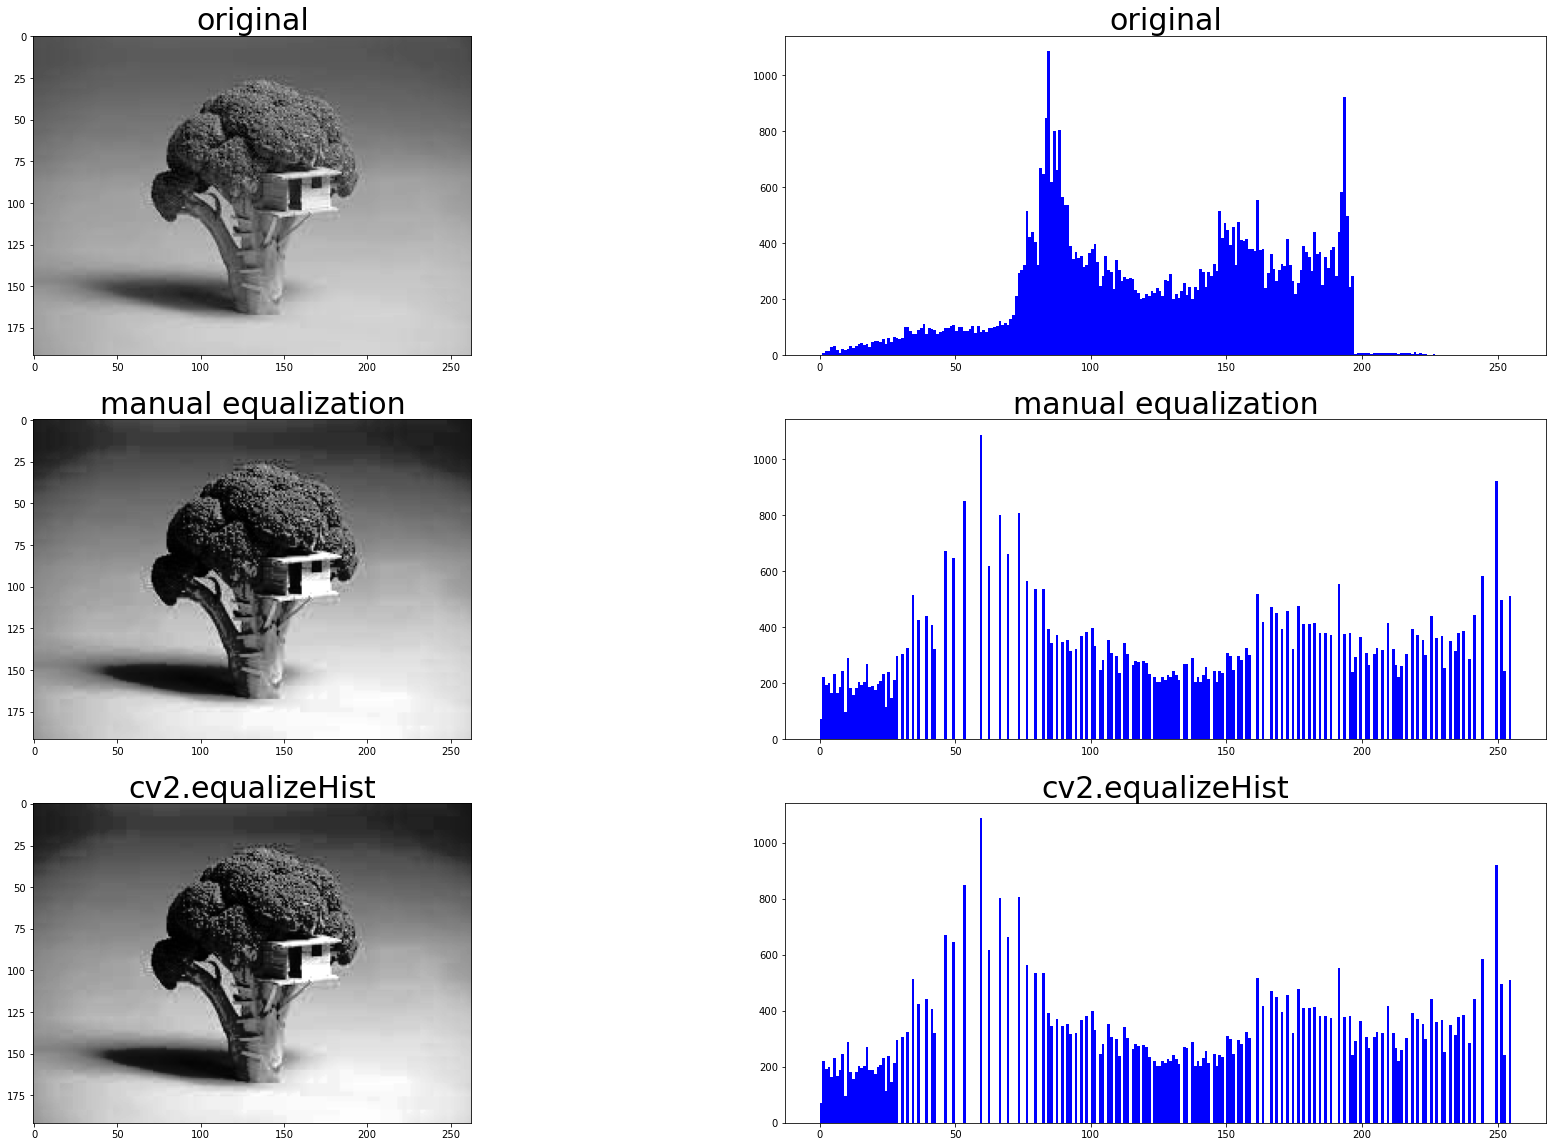

In [36]:
images = [img,new_img,cv2.equalizeHist(img)]
titles = ['original','manual equalization','cv2.equalizeHist']
plt.figure(figsize=(30,20))
for i in range(3):
    image_plotting(images[i],i*2+1,titles[i])